In [44]:
import pandas as pd
import numpy as np

In [4]:
consumer_train=pd.read_csv(r"E:\Jaison\Cource Meterials\Python\ML\Data\Project_1\Consumer_Complaints_train.csv")
consumer_test=pd.read_csv(r"E:\Jaison\Cource Meterials\Python\ML\Data\Project_1\Consumer_Complaints_test.csv")

In [5]:
consumer_train.shape

(478421, 18)

In [6]:
consumer_test.shape

(119606, 17)

In [7]:
percent_missing = consumer_train.isnull().sum() * 100 / len(consumer_train)
print(percent_missing)

Date received                    0.000000
Product                          0.000000
Sub-product                     28.943755
Issue                            0.000000
Sub-issue                       61.164748
Consumer complaint narrative    84.303783
Company public response         81.106181
Company                          0.000000
State                            0.802431
ZIP code                         0.804313
Tags                            85.952540
Consumer consent provided?      71.680382
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Complaint ID                     0.000000
dtype: float64


In [8]:
percent_missing = consumer_test.isnull().sum() * 100 / len(consumer_test)
print(percent_missing)

Date received                    0.000000
Product                          0.000000
Sub-product                     29.055399
Issue                            0.000000
Sub-issue                       61.083892
Consumer complaint narrative    84.484892
Company public response         80.957477
Company                          0.000000
State                            0.773373
ZIP code                         0.774209
Tags                            85.894520
Consumer consent provided?      71.687039
Submitted via                    0.000836
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Complaint ID                     0.000000
dtype: float64


In [9]:
consumer_train['Product'].value_counts().count()

12

In [10]:
consumer_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [11]:
consumer_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [12]:
consumer_train.corr()

,Complaint ID
Complaint ID,1.0


In [13]:
consumer_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572


In [14]:
for col in ['Issue','Sub-issue','Consumer complaint narrative','Company public response','Tags','Consumer consent provided?','Sub-product','ZIP code']:
    consumer_train.drop([col],1,inplace=True)
    consumer_test.drop([col],1,inplace=True)

In [15]:
consumer_train.dtypes

Date received                   object
Product                         object
Company                         object
State                           object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [16]:
for col in ['Date received','Date sent to company']:
    consumer_train[col]=pd.to_datetime(consumer_train[col],infer_datetime_format=True)
    consumer_test[col]=pd.to_datetime(consumer_test[col],infer_datetime_format=True)

In [17]:
consumer_train['day_diff']=pd.to_numeric(consumer_train['Date sent to company']-consumer_train['Date received'])
consumer_test['day_diff']=pd.to_numeric(consumer_test['Date sent to company']-consumer_test['Date received'])

In [18]:
import datetime

In [19]:
def extract_date(data):
    date=data['Date received'].astype(str)
    date_split=[]
    for day in date:
        date_split.append([day.split('-')[0],day.split('-')[1],day.split('-')[2]])
        #date_split.append([day.split('-')[0],day.split('-')[1],'19'+day.split('-')[2] if int(day.split('-')[2])>=20 else '20'+day.split('-')[2]])
    new_date=pd.DataFrame(date_split,columns=['Year_recived','MONTH_recived','Day_recived'])
    return new_date

In [20]:
consumer_train=pd.concat([consumer_train,extract_date(consumer_train)],axis=1)
consumer_test=pd.concat([consumer_test,extract_date(consumer_test)],axis=1)

In [21]:
def extract_date(data):
    date=data['Date sent to company'].astype(str)
    date_split=[]
    for day in date:
        date_split.append([day.split('-')[0],day.split('-')[1],day.split('-')[2]])
        #date_split.append([day.split('-')[0],day.split('-')[1],'19'+day.split('-')[2] if int(day.split('-')[2])>=20 else '20'+day.split('-')[2]])
    new_date=pd.DataFrame(date_split,columns=['Year_sent_to_company','MONTH_sent_to_company','Day_sent_to_company'])
    return new_date

In [22]:
consumer_train=pd.concat([consumer_train,extract_date(consumer_train)],axis=1)
consumer_test=pd.concat([consumer_test,extract_date(consumer_test)],axis=1)

In [23]:
for col in['Date received','Date sent to company']:
    consumer_train.drop([col],1,inplace=True)
    consumer_test.drop([col],1,inplace=True)

In [24]:
print(consumer_train.shape,consumer_test.shape)

(478421, 15) (119606, 14)


In [25]:
for col in ['Year_recived','MONTH_recived','Day_recived','Year_sent_to_company','MONTH_sent_to_company','Day_sent_to_company']:
    consumer_train[col]=consumer_train[col].astype(float)
    consumer_test[col]=consumer_test[col].astype(float)

In [26]:
def code_cyclic_features(data,columns,drop_cols=True):
    for col in columns:
        max_val=max(data[col])

        data[col+'_sin']=np.sin(2*np.pi*data[col]/max_val)
        data[col+'_cos']=np.cos(2*np.pi*data[col]/max_val)

        if drop_cols:
            del data[col]
    return data 

In [27]:
code_cyclic_features(consumer_train,['Year_recived','MONTH_recived','Day_recived'])
code_cyclic_features(consumer_test,['Year_recived','MONTH_recived','Day_recived'])

,Product,Company,State,Submitted via,Company response to consumer,Timely response?,Complaint ID,day_diff,Year_sent_to_company,MONTH_sent_to_company,Day_sent_to_company,Year_recived_sin,Year_recived_cos,MONTH_recived_sin,MONTH_recived_cos,Day_recived_sin,Day_recived_cos
0,Bank account or service,Bank of America,CA,Web,Closed with explanation,Yes,675956,-86400000000000,2014.0,1.0,17.0,-6.233278e-03,0.999981,5.000000e-01,8.660254e-01,-4.853020e-01,-0.874347
1,Debt collection,"National Credit Adjusters, LLC",FL,Web,Closed with explanation,Yes,1858795,0,2016.0,3.0,31.0,-2.449294e-16,1.000000,1.000000e+00,6.123234e-17,-2.449294e-16,1.000000
2,Mortgage,Wells Fargo & Company,CA,Web,Closed without relief,Yes,32637,86400000000000,2012.0,3.0,9.0,-1.246631e-02,0.999922,1.000000e+00,6.123234e-17,9.987165e-01,-0.050649
3,Credit reporting,"TransUnion Intermediate Holdings, Inc.",FL,Postal mail,Closed with non-monetary relief,Yes,1731374,432000000000000,2016.0,1.0,12.0,-2.449294e-16,1.000000,5.000000e-01,8.660254e-01,9.884683e-01,0.151428
4,Mortgage,Bank of America,FL,Web,Closed with explanation,Yes,501487,0,2013.0,8.0,23.0,-9.349842e-03,0.999956,-8.660254e-01,-5.000000e-01,-9.987165e-01,-0.050649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,JPMorgan Chase & Co.,IL,Web,Closed with monetary relief,Yes,153482,518400000000000,2012.0,9.0,21.0,-1.246631e-02,0.999922,-1.000000e+00,-1.836970e-16,1.011683e-01,-0.994869
119602,Credit reporting,Experian,CA,Web,Closed with explanation,Yes,2023523,0,2016.0,7.0,21.0,-2.449294e-16,1.000000,-5.000000e-01,-8.660254e-01,-8.978045e-01,-0.440394
119603,Debt collection,"FAIR COLLECTIONS & OUTSOURCING, INC.",CA,Phone,Closed with explanation,Yes,1413678,259200000000000,2015.0,6.0,12.0,-3.116654e-03,0.999995,1.224647e-16,-1.000000e+00,9.680771e-01,-0.250653
119604,Debt collection,Encore Capital Group,PA,Phone,Closed with explanation,Yes,732458,86400000000000,2014.0,2.0,27.0,-6.233278e-03,0.999981,8.660254e-01,5.000000e-01,-8.486443e-01,0.528964


In [28]:
code_cyclic_features(consumer_train,['Year_sent_to_company','MONTH_sent_to_company','Day_sent_to_company'])
code_cyclic_features(consumer_test,['Year_sent_to_company','MONTH_sent_to_company','Day_sent_to_company'])

,Product,Company,State,Submitted via,Company response to consumer,Timely response?,Complaint ID,day_diff,Year_recived_sin,Year_recived_cos,MONTH_recived_sin,MONTH_recived_cos,Day_recived_sin,Day_recived_cos,Year_sent_to_company_sin,Year_sent_to_company_cos,MONTH_sent_to_company_sin,MONTH_sent_to_company_cos,Day_sent_to_company_sin,Day_sent_to_company_cos
0,Bank account or service,Bank of America,CA,Web,Closed with explanation,Yes,675956,-86400000000000,-6.233278e-03,0.999981,5.000000e-01,8.660254e-01,-4.853020e-01,-0.874347,-6.233278e-03,0.999981,5.000000e-01,8.660254e-01,-2.993631e-01,-0.954139
1,Debt collection,"National Credit Adjusters, LLC",FL,Web,Closed with explanation,Yes,1858795,0,-2.449294e-16,1.000000,1.000000e+00,6.123234e-17,-2.449294e-16,1.000000,-2.449294e-16,1.000000,1.000000e+00,6.123234e-17,-2.449294e-16,1.000000
2,Mortgage,Wells Fargo & Company,CA,Web,Closed without relief,Yes,32637,86400000000000,-1.246631e-02,0.999922,1.000000e+00,6.123234e-17,9.987165e-01,-0.050649,-1.246631e-02,0.999922,1.000000e+00,6.123234e-17,9.680771e-01,-0.250653
3,Credit reporting,"TransUnion Intermediate Holdings, Inc.",FL,Postal mail,Closed with non-monetary relief,Yes,1731374,432000000000000,-2.449294e-16,1.000000,5.000000e-01,8.660254e-01,9.884683e-01,0.151428,-2.449294e-16,1.000000,5.000000e-01,8.660254e-01,6.513725e-01,-0.758758
4,Mortgage,Bank of America,FL,Web,Closed with explanation,Yes,501487,0,-9.349842e-03,0.999956,-8.660254e-01,-5.000000e-01,-9.987165e-01,-0.050649,-9.349842e-03,0.999956,-8.660254e-01,-5.000000e-01,-9.987165e-01,-0.050649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,JPMorgan Chase & Co.,IL,Web,Closed with monetary relief,Yes,153482,518400000000000,-1.246631e-02,0.999922,-1.000000e+00,-1.836970e-16,1.011683e-01,-0.994869,-1.246631e-02,0.999922,-1.000000e+00,-1.836970e-16,-8.978045e-01,-0.440394
119602,Credit reporting,Experian,CA,Web,Closed with explanation,Yes,2023523,0,-2.449294e-16,1.000000,-5.000000e-01,-8.660254e-01,-8.978045e-01,-0.440394,-2.449294e-16,1.000000,-5.000000e-01,-8.660254e-01,-8.978045e-01,-0.440394
119603,Debt collection,"FAIR COLLECTIONS & OUTSOURCING, INC.",CA,Phone,Closed with explanation,Yes,1413678,259200000000000,-3.116654e-03,0.999995,1.224647e-16,-1.000000e+00,9.680771e-01,-0.250653,-3.116654e-03,0.999995,1.224647e-16,-1.000000e+00,6.513725e-01,-0.758758
119604,Debt collection,Encore Capital Group,PA,Phone,Closed with explanation,Yes,732458,86400000000000,-6.233278e-03,0.999981,8.660254e-01,5.000000e-01,-8.486443e-01,0.528964,-6.233278e-03,0.999981,8.660254e-01,5.000000e-01,-7.247928e-01,0.688967


In [29]:
import seaborn as sns

[]

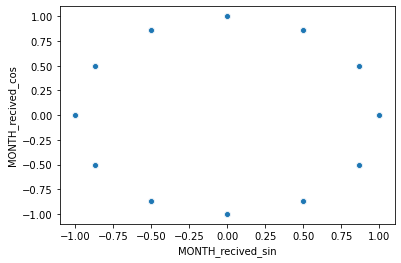

In [30]:
sns.scatterplot(consumer_train['MONTH_recived_sin'],consumer_train['MONTH_recived_cos']).plot()

[]

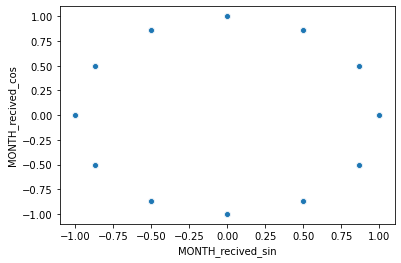

In [31]:
sns.scatterplot(consumer_test['MONTH_recived_sin'],consumer_test['MONTH_recived_cos']).plot()

In [32]:
consumer_train.dtypes

Product                          object
Company                          object
State                            object
Submitted via                    object
Company response to consumer     object
Timely response?                 object
Consumer disputed?               object
Complaint ID                      int64
day_diff                          int64
Year_recived_sin                float64
Year_recived_cos                float64
MONTH_recived_sin               float64
MONTH_recived_cos               float64
Day_recived_sin                 float64
Day_recived_cos                 float64
Year_sent_to_company_sin        float64
Year_sent_to_company_cos        float64
MONTH_sent_to_company_sin       float64
MONTH_sent_to_company_cos       float64
Day_sent_to_company_sin         float64
Day_sent_to_company_cos         float64
dtype: object

In [33]:
for col in consumer_train.select_dtypes(['object']).columns:
    print(col,':',consumer_train[col].nunique())

Product : 12
Company : 3276
State : 62
Submitted via : 6
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2


In [34]:
for col in consumer_test.select_dtypes(['object']).columns:
    print(col,':',consumer_test[col].nunique())

Product : 12
Company : 2237
State : 62
Submitted via : 6
Company response to consumer : 7
Timely response? : 2


In [55]:
consumer_train['Company response to consumer'].value_counts()

Closed with explanation            354310
Closed with non-monetary relief     61491
Closed with monetary relief         32925
Closed without relief               14145
Closed                              11365
Closed with relief                   4184
Untimely response                       1
Name: Company response to consumer, dtype: int64

In [35]:
for col in consumer_train.columns:
        if consumer_train[col].dtype==object:
            if consumer_train[col].value_counts().count()>12:
                print (col,':',consumer_train[col].value_counts().count())

Company : 3276
State : 62


In [36]:
for col in consumer_test.columns:
        if consumer_test[col].dtype==object:
            if consumer_test[col].value_counts().count()>12:
                print (col,':',consumer_test[col].value_counts().count())

Company : 2237
State : 62


In [37]:
from keras.models import Model,Sequential
from keras.layers import Dense,Input

Using TensorFlow backend.
E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\ProgramData\Anaconda3\envs\te

In [40]:
for col in consumer_train.columns:
        if consumer_train[col].dtype==object:
            if consumer_train[col].value_counts().count()>12:
                #print (col,':',hs_train[col].value_counts().count())

                dummy_data=pd.get_dummies(consumer_train[col],prefix=col)
                dummy_data.shape[1]

                y=pd.get_dummies(consumer_train[col],prefix=col)

                embedding_dim=3
                inputs=Input(shape=(dummy_data.shape[1],))
                dense1=Dense(50,activation='relu')(inputs)
                embedded_output=Dense(embedding_dim)(dense1)
                outputs=Dense(dummy_data.shape[1],activation='softmax')(embedded_output)
                model=Model(inputs=inputs,outputs=outputs)

                embedder=Model(inputs=inputs,outputs=embedded_output)

                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                model.fit(dummy_data,y,epochs=150,batch_size=100)

                low_dim=pd.DataFrame(embedder.predict(dummy_data),columns=[col+'1',col+'2',col+'3'])
                #low_dim.head()

                consumer_train=pd.concat([consumer_train,low_dim],axis=1)
                consumer_train=consumer_train.drop([col],axis=1)
                print('======================'+col+'- Finished ! ==================================')
                
pet_train.shape  

Epoch 1/150
478421/478421 [==============================] - 96s 201us/step - loss: 1.8506 - accuracy: 0.6397
Epoch 2/150
478421/478421 [==============================] - 163s 341us/step - loss: 0.5701 - accuracy: 0.8791
Epoch 3/150
478421/478421 [==============================] - 203s 425us/step - loss: 0.4061 - accuracy: 0.9134
Epoch 4/150
478421/478421 [==============================] - 208s 436us/step - loss: 0.3443 - accuracy: 0.9250
Epoch 5/150
478421/478421 [==============================] - 212s 444us/step - loss: 0.3122 - accuracy: 0.9310
Epoch 6/150
478421/478421 [==============================] - 220s 460us/step - loss: 0.2928 - accuracy: 0.9343
Epoch 7/150
478421/478421 [==============================] - 219s 457us/step - loss: 0.2773 - accuracy: 0.9373
Epoch 8/150
478421/478421 [==============================] - 219s 457us/step - loss: 0.2668 - accuracy: 0.9396
Epoch 9/150
478421/478421 [==============================] - 222s 463us/step - loss: 0.2569 - accuracy: 0.9419
Ep

478421/478421 [==============================] - 192s 402us/step - loss: 0.1022 - accuracy: 0.9776
Epoch 146/150
478421/478421 [==============================] - 193s 404us/step - loss: 0.1017 - accuracy: 0.9777
Epoch 147/150
478421/478421 [==============================] - 193s 404us/step - loss: 0.1015 - accuracy: 0.9773
Epoch 148/150
478421/478421 [==============================] - 197s 411us/step - loss: 0.1006 - accuracy: 0.9778
Epoch 149/150
478421/478421 [==============================] - 194s 405us/step - loss: 0.1013 - accuracy: 0.9776
Epoch 150/150
478421/478421 [==============================] - 196s 409us/step - loss: 0.1008 - accuracy: 0.9779
======================Company- Finished ! ==================================
Epoch 1/150
478421/478421 [==============================] - 22s 45us/step - loss: 0.3388 - accuracy: 0.9130
Epoch 2/150
478421/478421 [==============================] - 19s 39us/step - loss: 0.0112 - accuracy: 0.9909
Epoch 3/150
478421/478421 [==============

478421/478421 [==============================] - 27s 57us/step - loss: 2086.4811 - accuracy: 0.7770
Epoch 140/150
478421/478421 [==============================] - 28s 59us/step - loss: 2075.7831 - accuracy: 0.7801
Epoch 141/150
478421/478421 [==============================] - 30s 63us/step - loss: 2166.2046 - accuracy: 0.7754
Epoch 142/150
478421/478421 [==============================] - 28s 58us/step - loss: 2237.9395 - accuracy: 0.7762
Epoch 143/150
478421/478421 [==============================] - 27s 55us/step - loss: 2258.0932 - accuracy: 0.7734
Epoch 144/150
478421/478421 [==============================] - 28s 59us/step - loss: 2279.2585 - accuracy: 0.7744
Epoch 145/150
478421/478421 [==============================] - 26s 55us/step - loss: 2304.1280 - accuracy: 0.7781
Epoch 146/150
478421/478421 [==============================] - 24s 50us/step - loss: 2365.9375 - accuracy: 0.7760
Epoch 147/150
478421/478421 [==============================] - 25s 52us/step - loss: 2401.1196 - accur

NameError: name 'pet_train' is not defined

In [41]:
consumer_train.head()

,Product,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_diff,Year_recived_sin,Year_recived_cos,MONTH_recived_sin,...,MONTH_sent_to_company_sin,MONTH_sent_to_company_cos,Day_sent_to_company_sin,Day_sent_to_company_cos,Company1,Company2,Company3,State1,State2,State3
0,Credit card,Web,Closed with explanation,Yes,No,856103,86400000000000,-0.006233,0.999981,0.5,...,0.500000,-8.660254e-01,-0.101168,-0.994869,592.337463,-1033.426636,188.070160,7247378.5,7161603.0,7612285.0
1,Bank account or service,Referral,Closed,Yes,No,1034666,518400000000000,-0.006233,0.999981,-1.0,...,-1.000000,-1.836970e-16,-0.988468,0.151428,-469.150635,-260.320953,767.793335,7597372.5,7573183.5,7868616.5
2,Credit reporting,Referral,Closed with non-monetary relief,Yes,No,756363,1814400000000000,-0.006233,0.999981,1.0,...,0.866025,-5.000000e-01,0.571268,0.820763,993.661926,-502.410400,-131.305557,7766343.5,7846194.5,8141565.0
3,Credit card,Web,Closed with monetary relief,Yes,No,1474177,0,-0.003117,0.999995,-0.5,...,-0.500000,-8.660254e-01,-0.299363,-0.954139,-993.742615,430.566772,62.125282,7600993.5,7556128.0,7886592.0
4,Credit card,Web,Closed with explanation,Yes,No,1132572,691200000000000,-0.006233,0.999981,-0.5,...,-0.500000,8.660254e-01,-0.571268,0.820763,144.347183,-953.043457,995.006226,7257314.5,7219338.5,7428970.0


In [43]:
consumer_train.to_csv('consumer_train_CE.csv', index=False)

In [45]:
for col in consumer_test.columns:
        if consumer_test[col].dtype==object:
            if consumer_test[col].value_counts().count()>12:
                #print (col,':',hs_train[col].value_counts().count())

                dummy_data=pd.get_dummies(consumer_test[col],prefix=col)
                dummy_data.shape[1]

                y=pd.get_dummies(consumer_test[col],prefix=col)

                embedding_dim=3
                inputs=Input(shape=(dummy_data.shape[1],))
                dense1=Dense(50,activation='relu')(inputs)
                embedded_output=Dense(embedding_dim)(dense1)
                outputs=Dense(dummy_data.shape[1],activation='softmax')(embedded_output)
                model=Model(inputs=inputs,outputs=outputs)

                embedder=Model(inputs=inputs,outputs=embedded_output)

                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                model.fit(dummy_data,y,epochs=150,batch_size=100)

                low_dim=pd.DataFrame(embedder.predict(dummy_data),columns=[col+'1',col+'2',col+'3'])
                #low_dim.head()

                consumer_test=pd.concat([consumer_test,low_dim],axis=1)
                consumer_test=consumer_test.drop([col],axis=1)
                print('======================'+col+'- Finished ! ==================================')
                
consumer_test.shape

Epoch 1/150
119606/119606 [==============================] - 21s 172us/step - loss: 3.4994 - accuracy: 0.3363s - loss: 3.6767 -  - ETA: 1s -
Epoch 2/150
119606/119606 [==============================] - 14s 115us/step - loss: 1.4461 - accuracy: 0.7053
Epoch 3/150
119606/119606 [==============================] - 14s 114us/step - loss: 0.9894 - accuracy: 0.7902
Epoch 4/150
119606/119606 [==============================] - 16s 130us/step - loss: 0.7605 - accuracy: 0.8389
Epoch 5/150
119606/119606 [==============================] - 23s 189us/step - loss: 0.6292 - accuracy: 0.8653
Epoch 6/150
119606/119606 [==============================] - 26s 221us/step - loss: 0.5440 - accuracy: 0.8844
Epoch 7/150
119606/119606 [==============================] - 27s 225us/step - loss: 0.4835 - accuracy: 0.8963s - loss: 0.4836 - accuracy: 0.89
Epoch 8/150
119606/119606 [==============================] - 28s 237us/step - loss: 0.4422 - accuracy: 0.9043
Epoch 9/150
119606/119606 [=============================

119606/119606 [==============================] - 32s 265us/step - loss: 0.1968 - accuracy: 0.9519
Epoch 74/150
119606/119606 [==============================] - 40s 335us/step - loss: 0.1901 - accuracy: 0.9535
Epoch 75/150
119606/119606 [==============================] - 48s 403us/step - loss: 0.1978 - accuracy: 0.9516
Epoch 76/150
119606/119606 [==============================] - 49s 411us/step - loss: 0.1935 - accuracy: 0.9526
Epoch 77/150
119606/119606 [==============================] - 38s 315us/step - loss: 0.1881 - accuracy: 0.9543
Epoch 78/150
119606/119606 [==============================] - 33s 272us/step - loss: 0.1925 - accuracy: 0.9529
Epoch 79/150
119606/119606 [==============================] - 32s 272us/step - loss: 0.1875 - accuracy: 0.9539
Epoch 80/150
119606/119606 [==============================] - 33s 274us/step - loss: 0.1914 - accuracy: 0.9534
Epoch 81/150
119606/119606 [==============================] - 33s 277us/step - loss: 0.1842 - accuracy: 0.9549
Epoch 82/150
1

119606/119606 [==============================] - 7s 55us/step - loss: 19.7144 - accuracy: 0.8405
Epoch 71/150
119606/119606 [==============================] - 8s 64us/step - loss: 22.3868 - accuracy: 0.8240
Epoch 72/150
119606/119606 [==============================] - 7s 59us/step - loss: 21.4007 - accuracy: 0.8377
Epoch 73/150
119606/119606 [==============================] - 8s 69us/step - loss: 23.5072 - accuracy: 0.8213
Epoch 74/150
119606/119606 [==============================] - 7s 59us/step - loss: 21.3421 - accuracy: 0.8486
Epoch 75/150
119606/119606 [==============================] - 8s 70us/step - loss: 24.5799 - accuracy: 0.8239
Epoch 76/150
119606/119606 [==============================] - 7s 60us/step - loss: 25.6270 - accuracy: 0.8274
Epoch 77/150
119606/119606 [==============================] - 8s 70us/step - loss: 26.0896 - accuracy: 0.8284
Epoch 78/150
119606/119606 [==============================] - 7s 59us/step - loss: 25.4146 - accuracy: 0.8309
Epoch 79/150
119606/119

119606/119606 [==============================] - 7s 56us/step - loss: 89.4282 - accuracy: 0.8304
Epoch 145/150
119606/119606 [==============================] - 8s 68us/step - loss: 92.4220 - accuracy: 0.8290
Epoch 146/150
119606/119606 [==============================] - 7s 58us/step - loss: 104.2768 - accuracy: 0.8178
Epoch 147/150
119606/119606 [==============================] - 8s 63us/step - loss: 94.1507 - accuracy: 0.8306
Epoch 148/150
119606/119606 [==============================] - 7s 55us/step - loss: 102.2192 - accuracy: 0.8275
Epoch 149/150
119606/119606 [==============================] - 6s 48us/step - loss: 104.4609 - accuracy: 0.8262
Epoch 150/150
119606/119606 [==============================] - 6s 48us/step - loss: 96.7993 - accuracy: 0.8352
======================State- Finished ! ==================================


(119606, 24)

In [46]:
consumer_test.to_csv('consumer_test_CE.csv', index=False)

In [ ]:
# Read the data

In [1]:
import pandas as pd
import numpy as np
consumer_train=pd.read_csv(r"consumer_train_CE.csv")
consumer_test=pd.read_csv(r"consumer_test_CE.csv")

In [3]:
consumer_train.head()

,Product,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_diff,Year_recived_sin,Year_recived_cos,MONTH_recived_sin,...,MONTH_sent_to_company_sin,MONTH_sent_to_company_cos,Day_sent_to_company_sin,Day_sent_to_company_cos,Company1,Company2,Company3,State1,State2,State3
0,Credit card,Web,Closed with explanation,Yes,No,856103,86400000000000,-0.006233,0.999981,0.5,...,0.500000,-8.660254e-01,-0.101168,-0.994869,592.33746,-1033.42660,188.070160,7247378.5,7161603.0,7612285.0
1,Bank account or service,Referral,Closed,Yes,No,1034666,518400000000000,-0.006233,0.999981,-1.0,...,-1.000000,-1.836970e-16,-0.988468,0.151428,-469.15063,-260.32095,767.793330,7597372.5,7573183.5,7868616.5
2,Credit reporting,Referral,Closed with non-monetary relief,Yes,No,756363,1814400000000000,-0.006233,0.999981,1.0,...,0.866025,-5.000000e-01,0.571268,0.820763,993.66190,-502.41040,-131.305560,7766343.5,7846194.5,8141565.0
3,Credit card,Web,Closed with monetary relief,Yes,No,1474177,0,-0.003117,0.999995,-0.5,...,-0.500000,-8.660254e-01,-0.299363,-0.954139,-993.74260,430.56677,62.125282,7600993.5,7556128.0,7886592.0
4,Credit card,Web,Closed with explanation,Yes,No,1132572,691200000000000,-0.006233,0.999981,-0.5,...,-0.500000,8.660254e-01,-0.571268,0.820763,144.34718,-953.04346,995.006200,7257314.5,7219338.5,7428970.0


In [4]:
consumer_test.head()

,Product,Submitted via,Company response to consumer,Timely response?,Complaint ID,day_diff,Year_recived_sin,Year_recived_cos,MONTH_recived_sin,MONTH_recived_cos,...,MONTH_sent_to_company_sin,MONTH_sent_to_company_cos,Day_sent_to_company_sin,Day_sent_to_company_cos,Company1,Company2,Company3,State1,State2,State3
0,Bank account or service,Web,Closed with explanation,Yes,675956,-86400000000000,-6.233278e-03,0.999981,0.500000,8.660254e-01,...,0.500000,8.660254e-01,-2.993631e-01,-0.954139,-224.89369,1190.53750,-430.71298,376202.28,-358533.38,365107.60
1,Debt collection,Web,Closed with explanation,Yes,1858795,0,-2.449294e-16,1.000000,1.000000,6.123234e-17,...,1.000000,6.123234e-17,-2.449294e-16,1.000000,-370.65360,-155.98863,562.43780,377081.00,-359645.66,363891.34
2,Mortgage,Web,Closed without relief,Yes,32637,86400000000000,-1.246631e-02,0.999922,1.000000,6.123234e-17,...,1.000000,6.123234e-17,9.680771e-01,-0.250653,-968.49396,313.34198,-321.29807,376202.28,-358533.38,365107.60
3,Credit reporting,Postal mail,Closed with non-monetary relief,Yes,1731374,432000000000000,-2.449294e-16,1.000000,0.500000,8.660254e-01,...,0.500000,8.660254e-01,6.513725e-01,-0.758758,117.36045,-509.94876,-1141.55140,377081.00,-359645.66,363891.34
4,Mortgage,Web,Closed with explanation,Yes,501487,0,-9.349842e-03,0.999956,-0.866025,-5.000000e-01,...,-0.866025,-5.000000e-01,-9.987165e-01,-0.050649,-224.89369,1190.53750,-430.71298,377081.00,-359645.66,363891.34


In [5]:
percent_missing = consumer_train.isnull().sum() * 100 / len(consumer_train)
print(percent_missing)

Product                         0.0
Submitted via                   0.0
Company response to consumer    0.0
Timely response?                0.0
Consumer disputed?              0.0
Complaint ID                    0.0
day_diff                        0.0
Year_recived_sin                0.0
Year_recived_cos                0.0
MONTH_recived_sin               0.0
MONTH_recived_cos               0.0
Day_recived_sin                 0.0
Day_recived_cos                 0.0
Year_sent_to_company_sin        0.0
Year_sent_to_company_cos        0.0
MONTH_sent_to_company_sin       0.0
MONTH_sent_to_company_cos       0.0
Day_sent_to_company_sin         0.0
Day_sent_to_company_cos         0.0
Company1                        0.0
Company2                        0.0
Company3                        0.0
State1                          0.0
State2                          0.0
State3                          0.0
dtype: float64


In [6]:
percent_missing = consumer_test.isnull().sum() * 100 / len(consumer_test)
print(percent_missing)

Product                         0.000000
Submitted via                   0.000836
Company response to consumer    0.000000
Timely response?                0.000000
Complaint ID                    0.000000
day_diff                        0.000000
Year_recived_sin                0.000000
Year_recived_cos                0.000000
MONTH_recived_sin               0.000000
MONTH_recived_cos               0.000000
Day_recived_sin                 0.000000
Day_recived_cos                 0.000000
Year_sent_to_company_sin        0.000000
Year_sent_to_company_cos        0.000000
MONTH_sent_to_company_sin       0.000000
MONTH_sent_to_company_cos       0.000000
Day_sent_to_company_sin         0.000000
Day_sent_to_company_cos         0.000000
Company1                        0.000000
Company2                        0.000000
Company3                        0.000000
State1                          0.000000
State2                          0.000000
State3                          0.000000
dtype: float64


In [5]:
consumer_train.isnull().sum()

Product                         0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
day_diff                        0
Year_recived_sin                0
Year_recived_cos                0
MONTH_recived_sin               0
MONTH_recived_cos               0
Day_recived_sin                 0
Day_recived_cos                 0
Year_sent_to_company_sin        0
Year_sent_to_company_cos        0
MONTH_sent_to_company_sin       0
MONTH_sent_to_company_cos       0
Day_sent_to_company_sin         0
Day_sent_to_company_cos         0
Company1                        0
Company2                        0
Company3                        0
State1                          0
State2                          0
State3                          0
dtype: int64

In [11]:
consumer_test.isnull().sum()

Product                         0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Complaint ID                    0
day_diff                        0
Year_recived_sin                0
Year_recived_cos                0
MONTH_recived_sin               0
MONTH_recived_cos               0
Day_recived_sin                 0
Day_recived_cos                 0
Year_sent_to_company_sin        0
Year_sent_to_company_cos        0
MONTH_sent_to_company_sin       0
MONTH_sent_to_company_cos       0
Day_sent_to_company_sin         0
Day_sent_to_company_cos         0
Company1                        0
Company2                        0
Company3                        0
State1                          0
State2                          0
State3                          0
dtype: int64

In [2]:
consumer_test['Submitted via']= consumer_test['Submitted via'].fillna('Web')

In [7]:
consumer_train.dtypes

Product                          object
Submitted via                    object
Company response to consumer     object
Timely response?                 object
Consumer disputed?               object
Complaint ID                      int64
day_diff                          int64
Year_recived_sin                float64
Year_recived_cos                float64
MONTH_recived_sin               float64
MONTH_recived_cos               float64
Day_recived_sin                 float64
Day_recived_cos                 float64
Year_sent_to_company_sin        float64
Year_sent_to_company_cos        float64
MONTH_sent_to_company_sin       float64
MONTH_sent_to_company_cos       float64
Day_sent_to_company_sin         float64
Day_sent_to_company_cos         float64
Company1                        float64
Company2                        float64
Company3                        float64
State1                          float64
State2                          float64
State3                          float64


In [8]:
consumer_test.dtypes

Product                          object
Submitted via                    object
Company response to consumer     object
Timely response?                 object
Complaint ID                      int64
day_diff                          int64
Year_recived_sin                float64
Year_recived_cos                float64
MONTH_recived_sin               float64
MONTH_recived_cos               float64
Day_recived_sin                 float64
Day_recived_cos                 float64
Year_sent_to_company_sin        float64
Year_sent_to_company_cos        float64
MONTH_sent_to_company_sin       float64
MONTH_sent_to_company_cos       float64
Day_sent_to_company_sin         float64
Day_sent_to_company_cos         float64
Company1                        float64
Company2                        float64
Company3                        float64
State1                          float64
State2                          float64
State3                          float64
dtype: object

In [5]:
consumer_train['Product'].value_counts()

Mortgage                   156175
Debt collection             86544
Credit reporting            81115
Credit card                 57358
Bank account or service     54403
Consumer Loan               18599
Student loan                14918
Money transfers              3349
Payday loan                  3219
Prepaid card                 2226
Other financial service       507
Virtual currency                8
Name: Product, dtype: int64

In [6]:
consumer_test['Product'].value_counts()

Mortgage                   38904
Debt collection            21503
Credit reporting           20497
Credit card                14255
Bank account or service    13691
Consumer Loan               4664
Student loan                3717
Payday loan                  829
Money transfers              827
Prepaid card                 587
Other financial service      128
Virtual currency               4
Name: Product, dtype: int64

In [7]:
consumer_train['Timely response?'].value_counts()

1    470277
0      8144
Name: Timely response?, dtype: int64

In [8]:
consumer_test['Submitted via'].value_counts()

Web            78449
Referral       22879
Phone           8541
Postal mail     7900
Fax             1756
Email             81
Name: Submitted via, dtype: int64

In [9]:
consumer_train['Submitted via'].value_counts()

Web            313916
Referral        91352
Phone           34417
Postal mail     31448
Fax              7032
Email             256
Name: Submitted via, dtype: int64

In [3]:
consumer_train["Consumer disputed?"]=np.where(consumer_train["Consumer disputed?"]=="Yes",1,0)
pd.to_numeric(consumer_train['Consumer disputed?'])
consumer_train['Timely response?']=np.where(consumer_train['Timely response?']=='Yes',1,0)
consumer_test['Timely response?']=np.where(consumer_test['Timely response?']=='Yes',1,0)

In [4]:
pd.to_numeric(consumer_train['Timely response?'])
pd.to_numeric(consumer_test['Timely response?'])

0         1
1         1
2         1
3         1
4         1
         ..
119601    1
119602    1
119603    1
119604    1
119605    1
Name: Timely response?, Length: 119606, dtype: int32

In [5]:
cat_cols=consumer_train.select_dtypes(['object']).columns

In [6]:
cat_cols

Index(['Product', 'Submitted via', 'Company response to consumer'], dtype='object')

In [7]:
for col in cat_cols:
    freqs=consumer_train[col].value_counts()
    k=freqs.index[freqs>50][:-1]
    for cat in k:
        name=col+'_'+cat
        consumer_train[name]=(consumer_train[col]==cat).astype(int)
    del consumer_train[col]
    print (col)

Product
Submitted via
Company response to consumer


In [8]:
cat_cols=consumer_test.select_dtypes(['object']).columns

In [9]:
for col in cat_cols:
    freqs=consumer_test[col].value_counts()
    k=freqs.index[freqs>50][:-1]
    for cat in k:
        name=col+'_'+cat
        consumer_test[name]=(consumer_test[col]==cat).astype(int)
    del consumer_test[col]
    print (col)

Product
Submitted via
Company response to consumer


In [10]:
print(consumer_train.shape,consumer_test.shape)

(478421, 42) (119606, 41)


In [11]:
consumer_train=consumer_train.drop(['Complaint ID'],axis=1)
consumer_test=consumer_test.drop(['Complaint ID'],axis=1)

In [12]:
consumer_train.reset_index(drop=True,inplace=True)
consumer_test.reset_index(drop=True,inplace=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
cn_train, cn_test = train_test_split(consumer_train, test_size = 0.2,random_state=2)

In [15]:
x_train=cn_train.drop(["Consumer disputed?"],1)
y_train=cn_train["Consumer disputed?"]

x_test=cn_test.drop(["Consumer disputed?"],1)
y_test=cn_test["Consumer disputed?"]

#x_train.reset_index(drop=True,inplace=True)
#y_train.reset_index(drop=True,inplace=True)

In [16]:
print(x_train.shape,y_train.shape)

(382736, 40) (382736,)


In [17]:
X=x_train
y=y_train

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [19]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(X,y)

ExtraTreesClassifier(n_jobs=-1)

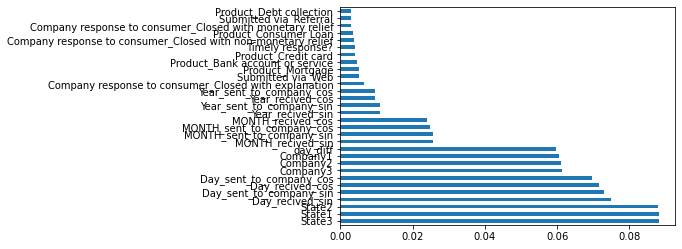

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [22]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [21]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from sklearn.ensemble import RandomForestClassifier

In [24]:
# rf=RandomForestClassifier(**{'criterion': 'entropy', 'max_depth': 50, 'max_features':30, 'n_estimators': 2500},n_jobs=-1)

In [26]:
rf=RandomForestClassifier(n_jobs=-1)

In [27]:
rf.fit(X,y)

RandomForestClassifier(n_jobs=-1)

In [1]:
interpreter = Interpretation(X, feature_names=X.columns)
model = InMemoryModel(rf.predict_proba, examples=X)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)
figure(figsize=(1,1))

NameError: name 'Interpretation' is not defined

In [17]:
dtree=RandomForestClassifier(n_jobs=-1)

In [18]:
dtree.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [19]:
dtree.classes_

array([0, 1])

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
dtree.score(x_train,y_train)

0.9884855357217508

In [22]:
dtree.fit(x_test,y_test)

RandomForestClassifier(n_jobs=-1)

In [23]:
dtree.score(x_test,y_test)

0.9964989287767153

In [24]:
rf=ExtraTreesClassifier(n_jobs=-1)
rf.fit(x_train,y_train)

ExtraTreesClassifier(n_jobs=-1)

In [25]:
rf.score(x_train,y_train)

0.9885012123238995

In [26]:
rf.fit(x_test,y_test)

ExtraTreesClassifier(n_jobs=-1)

In [27]:
rf.score(x_test,y_test)

0.9965093797355907

In [35]:
from xgboost.sklearn import XGBClassifier

In [37]:
XGB=XGBClassifier(objective='binary:logistic')

In [38]:
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
XGB.score(x_train,y_train)

0.795161678023494

In [41]:
XGB.fit(x_test,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
XGB.score(x_test,y_test)

0.8051523227256101

In [ ]:
#NN

In [44]:
MLP=MLPClassifier()

In [45]:
MLP.fit(x_train,y_train)

MLPClassifier()

In [46]:
MLP.score(x_train,y_train)

0.5497915011914217

In [47]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr=LogisticRegression(max_iter=5000)

In [51]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7875506876802809

In [60]:
consumer_test.shape

(119606, 40)

In [52]:
p=rf.predict(consumer_test)

In [55]:
p

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
temp=pd.read_csv(r"E:\Jaison\Cource Meterials\Python\ML\Data\Project_1\Consumer_Complaints_test.csv")

In [49]:
temp.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2014-01-18,Bank account or service,Cashing a check without an account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Web,2014-01-17,Closed with explanation,Yes,675956
1,2016-03-31,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"National Credit Adjusters, LLC",FL,32086,NaN,Consent not provided,Web,2016-03-31,Closed with explanation,Yes,1858795
2,2012-03-08,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,94618,NaN,NaN,Web,2012-03-09,Closed without relief,Yes,32637
3,2016-01-07,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",FL,33584,Older American,NaN,Postal mail,2016-01-12,Closed with non-monetary relief,Yes,1731374
4,2013-08-23,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,FL,33543,NaN,NaN,Web,2013-08-23,Closed with explanation,Yes,501487


In [57]:
submission=pd.DataFrame
({
    'pet_id': temp['Complaint ID'],
    'consumer_complaint':p
})

{'pet_id': 0          675956
 1         1858795
 2           32637
 3         1731374
 4          501487
            ...   
 119601     153482
 119602    2023523
 119603    1413678
 119604     732458
 119605    1235226
 Name: Complaint ID, Length: 119606, dtype: int64,
 'consumer_complaint': array([0, 0, 0, ..., 0, 0, 0])}

In [63]:
df = pd.DataFrame({'pet_id': temp['Complaint ID'],
                   'consumer_complaint': p
                  })
df.to_csv('Consumer.csv',index=False)

In [58]:
submission.to_csv('pet_adoption.csv', index=False)

AttributeError: 'str' object has no attribute 'to_frame'